In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("E:\\Data Science\\6.Data Cleaning\\claimants.csv")

In [5]:
df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,NaN,0.576,1
1336,34110,1.0,1.0,0.0,46.0,3.705,0
1337,34113,1.0,1.0,0.0,39.0,0.099,1
1338,34145,1.0,0.0,0.0,8.0,3.177,0


In [6]:
df.isnull().sum()

CASENUM       0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
ATTORNEY      0
dtype: int64

In [7]:
df["CLMAGE"].mean()

28.414422241529106

In [9]:
df['CLMAGE'].fillna(df["CLMAGE"].mean(),inplace=True)

In [10]:
df.isnull().sum()

CASENUM      0
CLMSEX      12
CLMINSUR    41
SEATBELT    48
CLMAGE       0
LOSS         0
ATTORNEY     0
dtype: int64

In [11]:
df['SEATBELT'].mode()

0    0.0
dtype: float64

In [19]:
df['SEATBELT'].fillna(df['SEATBELT'].mode(),inplace = True)

In [20]:
df.isnull().sum()

CASENUM      0
CLMSEX      12
CLMINSUR    41
SEATBELT    48
CLMAGE       0
LOSS         0
ATTORNEY     0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy = 'most_frequent')

In [24]:
df["SEATBELT"] = pd.DataFrame(mode_imputer.fit_transform(df[["SEATBELT"]]))

In [25]:
df.isnull().sum()

CASENUM      0
CLMSEX      12
CLMINSUR    41
SEATBELT     0
CLMAGE       0
LOSS         0
ATTORNEY     0
dtype: int64

In [26]:
df["CLMSEX"] = pd.DataFrame(mode_imputer.fit_transform(df[["CLMSEX"]]))

In [27]:
df.isnull().sum()

CASENUM      0
CLMSEX       0
CLMINSUR    41
SEATBELT     0
CLMAGE       0
LOSS         0
ATTORNEY     0
dtype: int64

In [28]:
df["CLMINSUR"] = pd.DataFrame(mode_imputer.fit_transform(df[["CLMINSUR"]]))

In [29]:
df.isnull().sum()

CASENUM     0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
ATTORNEY    0
dtype: int64

In [31]:
import seaborn as sns

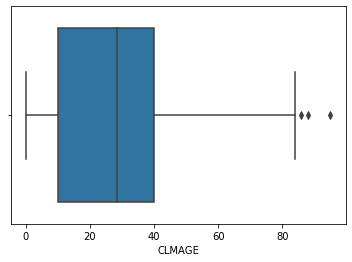

In [33]:
sns.boxplot(df["CLMAGE"])
plt.show()

In [37]:
Q3 = df["CLMAGE"].quantile(0.75)
Q1 =df["CLMAGE"].quantile(0.25)
IQR = Q3-Q1
print(Q1)
print(IQR)

10.0
30.0


In [40]:
lower_limit = Q1-1.5*(IQR)
print("Lower_Limit",lower_limit)
upper_limit = Q3+1.5*(IQR)
print("Upper_limit",upper_limit)

Lower_Limit -35.0
Upper_limit 85.0


In [41]:
trim_df = df[(df['CLMAGE']>lower_limit) & (df["CLMAGE"]< upper_limit)]

In [42]:
trim_df

,CASENUM,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,ATTORNEY
0,5,0.0,1.0,0.0,50.000000,34.940,0
1,3,1.0,0.0,0.0,18.000000,0.891,1
2,66,0.0,1.0,0.0,5.000000,0.330,1
3,70,0.0,1.0,1.0,31.000000,0.037,0
4,96,0.0,1.0,0.0,30.000000,0.038,1
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,28.414422,0.576,1
1336,34110,1.0,1.0,0.0,46.000000,3.705,0
1337,34113,1.0,1.0,0.0,39.000000,0.099,1
1338,34145,1.0,0.0,0.0,8.000000,3.177,0


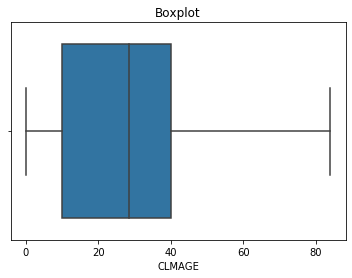

In [44]:
sns.boxplot(trim_df["CLMAGE"])
plt.title("Boxplot")
plt.show()